# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_periods
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


Lets take a closer look at churners

<AxesSubplot:title={'center':'Churn rate'}, xlabel='Churn', ylabel='Count'>

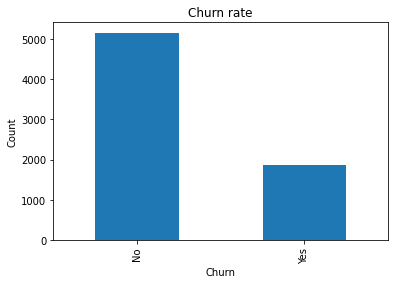

In [16]:
df.Churn.value_counts().plot(kind='bar', ylabel = 'Count', xlabel = 'Churn', title='Churn rate')

In [18]:
print(df.Churn.value_counts(normalize = True))

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


We can see that about 73% of customers did not churn and around 27% did churn. There might be some problems with model building because training data will be inbalanced. We might need to use some oversampling techniques. But will get back to it later in model building part.

Now lets split this data into categorical and numerical data.

In [19]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_periods'],
      dtype='object')

In [94]:
categorical = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure_periods']

In [26]:
numerical = ['Tenure', 'MonthlyCharges', 'TotalCharges']

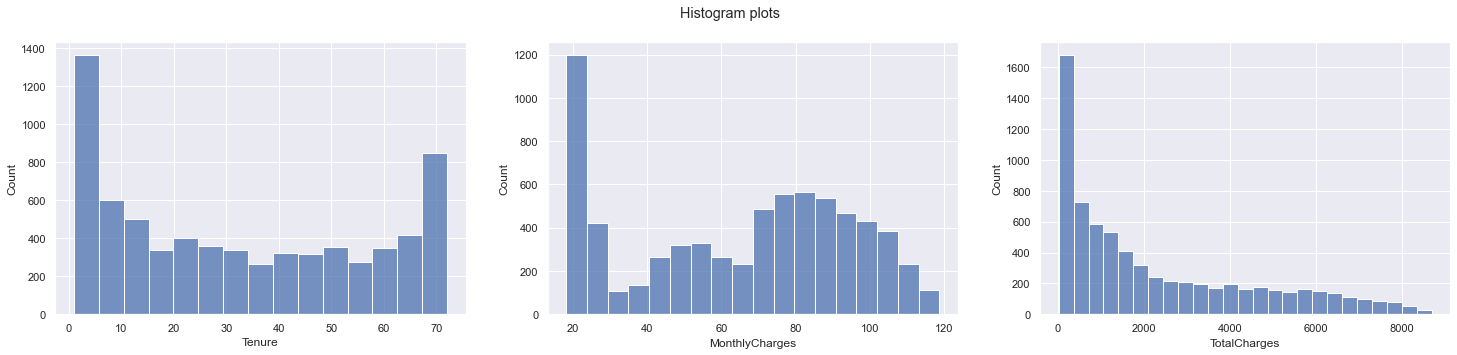

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)
fig.suptitle('Histogram plots')

for i in range(len(numerical)):
    sns.histplot(ax = axes[i],data = df, x = numerical[i])

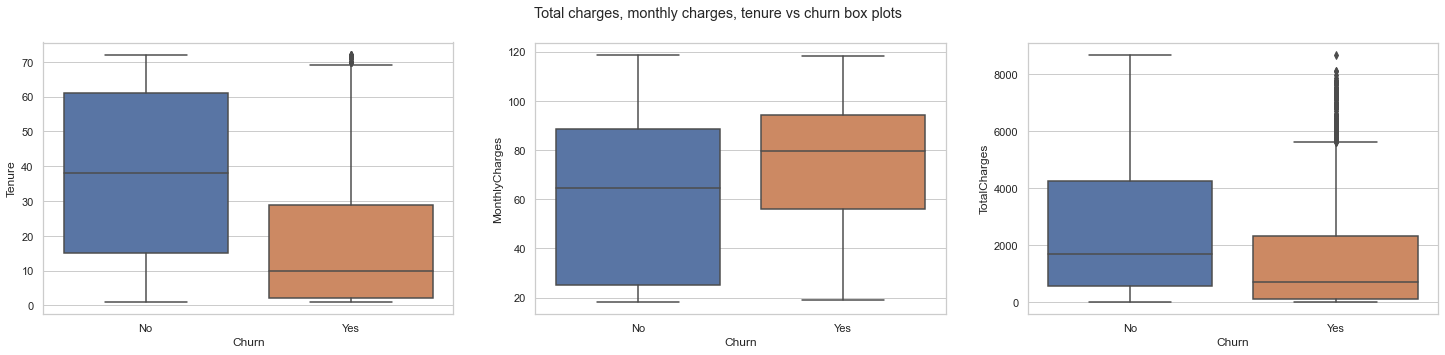

In [108]:
tmp_list = [['Tenure', 'MonthlyCharges', 'TotalCharges']]
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)
fig.suptitle('Total charges, monthly charges, tenure vs churn box plots')

for i in range(len(numerical)):
    sns.boxplot(ax = axes[i],data = df, x = 'Churn', y = numerical[i])

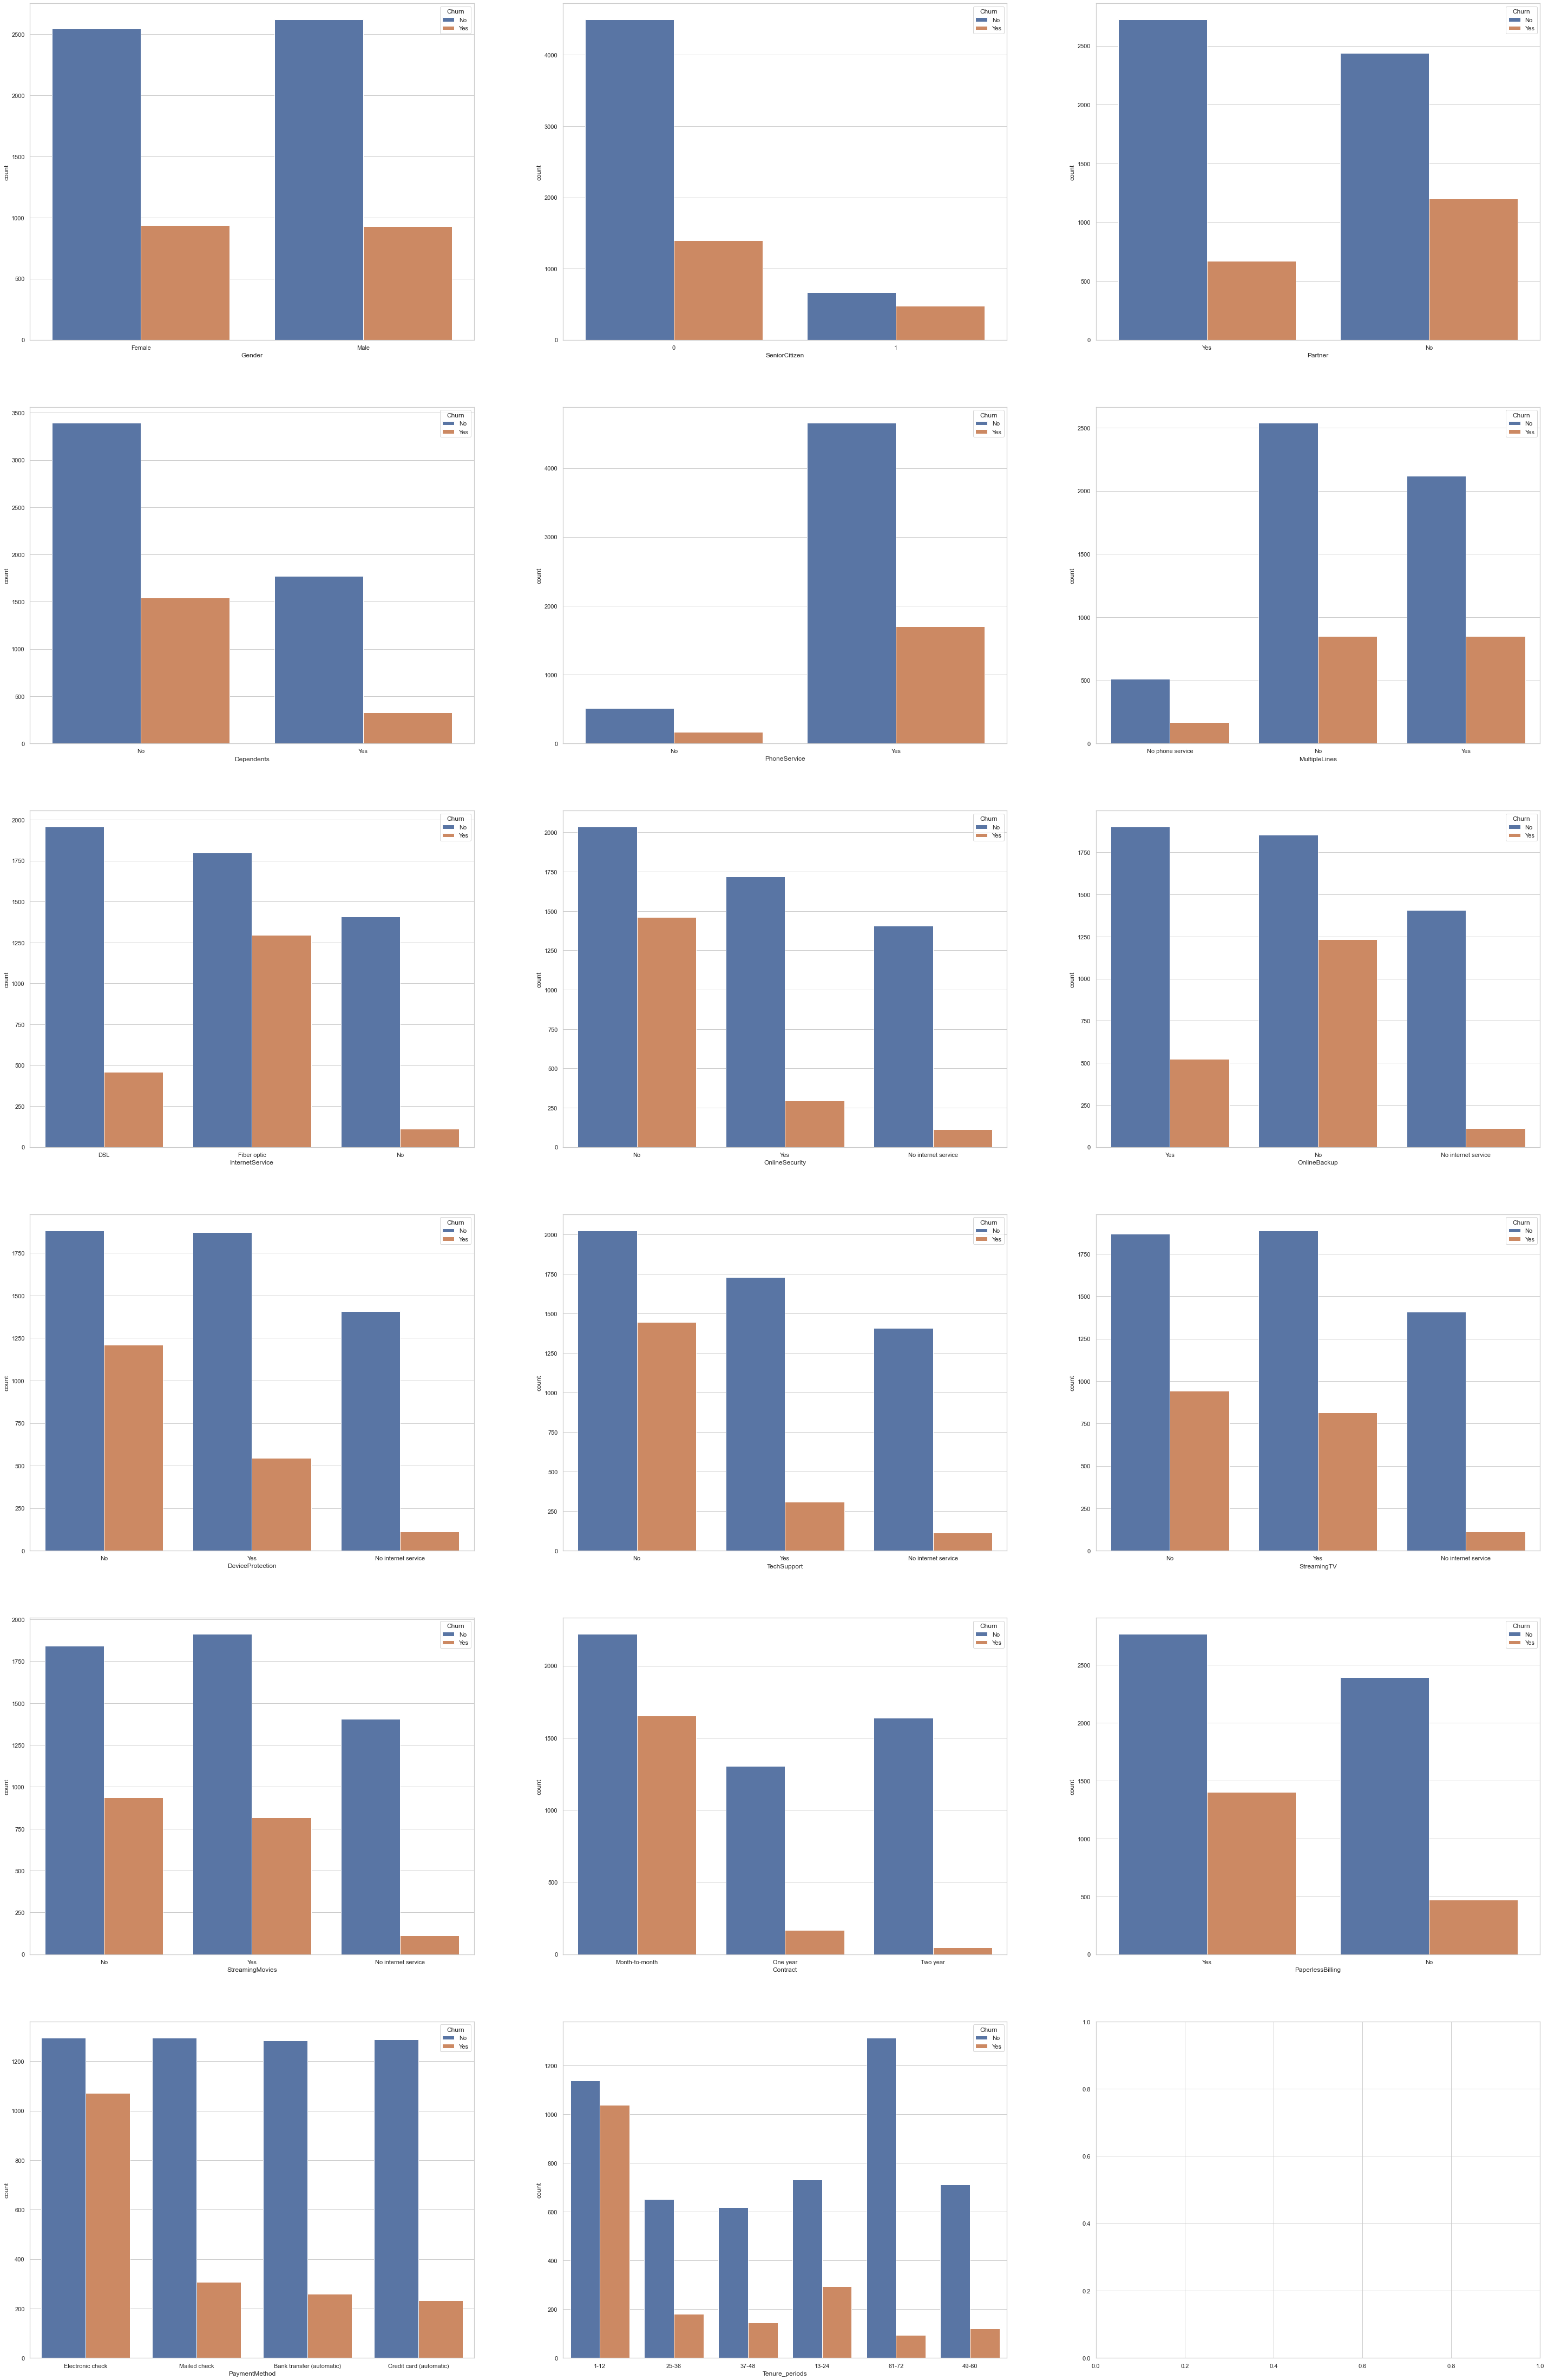

In [104]:
fig , ax = plt.subplots(6,3,figsize = (50,80))
for i , subplots in zip (categorical , ax.flatten()):
  sns.countplot(data =df, x = i ,hue = 'Churn', ax = subplots)
plt.show()